In [ ]:
import pandas as pd

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me

Mounted at /content/drive
/content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

## INTRO
- make model
- check weight bias (initial)
- stack layers

In [ ]:
df = pd.read_csv('data/red-wine.csv')
print(df.shape)

X_total = df.drop('quality', axis=1)
y_total = df.quality

X_train, X_test, y_train, y_test = train_test_split(X_total, y_total)

(1599, 12)


In [ ]:
model = keras.Sequential([
                          layers.Dense(units=1, input_shape=[11])
])

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
 array([[ 0.01629853],
        [ 0.44574088],
        [ 0.19953465],
        [ 0.02781558],
        [-0.53661233],
        [-0.07717729],
        [-0.4999432 ],
        [ 0.6121331 ],
        [ 0.26843208],
        [ 0.4623981 ],
        [ 0.68242866]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

### ploting initial weights

In [ ]:
help(layers)

Help on package tensorflow.keras.layers in tensorflow.keras:

NAME
    tensorflow.keras.layers - Keras layers API.

PACKAGE CONTENTS
    experimental (package)

FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/layers/__init__.py




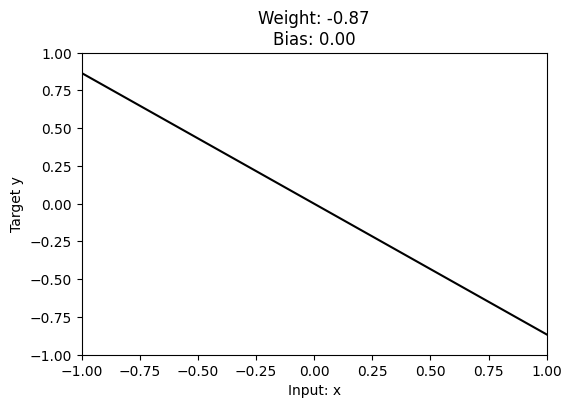

In [ ]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(1,)))
model.add(layers.Dense(1))

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

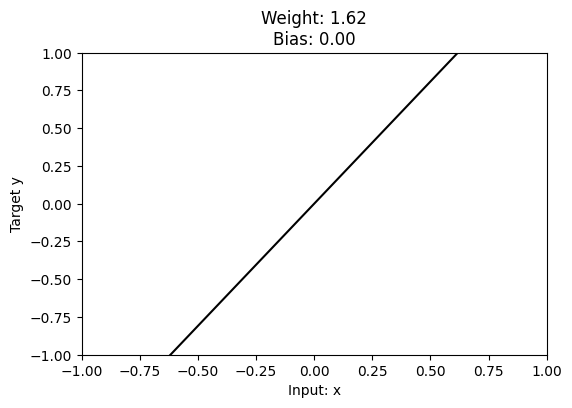

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## Stack

In [ ]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(11,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))

### Check the activation function

In [ ]:
activation_list = ['relu', 'elu', 'selu', 'swish']

for activation in activation_list:
  activation_layer = layers.Activation(activation)

  x = tf.linspace(-3.0, 3.0, 100)
  y = activation_layer(x) # once created, a layer is callable just like a function

  plt.figure(figsize=(4,2))
  plt.plot(x, y)
  plt.xlim(-3, 3)
  plt.xlabel(activation)
  plt.ylabel("Output")
  plt.show()

### Loss Function

In [ ]:
model.compile(optimizer='adam',loss='mae')

### learn

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=100, verbose=1)

In [ ]:
result = pd.DataFrame(history.history)
result

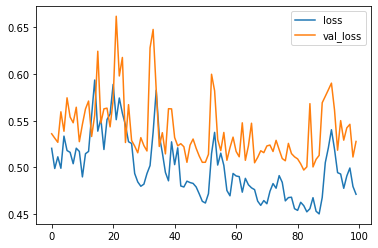

In [ ]:
result.plot()

# Underfitting Overfitting
- validation_loss 가 증가하지 않고 계속 일정하게 머무른다면,
  - 언더피팅인 모델 가능성이 높다.
  - 모델을 조금더 복잡하게. 층을 늘리거나 뉴런을 늘리거나
- validation loss가 처음부터 바로 증가하면...
  - 오버피팅하는 모델이다
  - 복잡도를 줄여야한다.

## early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

## Dropout
  - Correct overfitting

## Batch Normalization
- Normalize input data and rescale
- help optimization learning model that is slow and unstable
- usually needed to have fewer epochs

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# Binary Classification
- LOSS :: CROSS ENTROPY
  - layers.compile(loss='bianry_crossentropy')
- DECISION :: SIGMOID
  - layers.Dense(1, activation='sigmoid')

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)